In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import matplotlib.ticker as mtick

import glob

In [56]:
import world_bank_data as wb

pop = pd.DataFrame(wb.get_series('SP.POP.TOTL', mrv=1))
pop = pop.reset_index()

In [57]:
# pop[pop['Country'] == 'Korea, Rep.']
# pd.set_option('display.max_rows', 500)
# display(pop)

In [58]:
df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv', \
                 parse_dates=True)

In [59]:
df = df[df['Province/State'] != 'Diamond Princess']
df = df[df['Province/State'] != 'Grand Princess']

In [60]:
df = df.groupby('Country/Region').sum()

In [61]:
df = df.T

In [62]:
df = df.drop('Lat')
df = df.drop('Long')

In [63]:
df = df.rename(columns={"US": "United States"}, errors="raise")
df = df.rename(columns={"Korea, South": "Korea, Rep."}, errors="raise")
df.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=165)

In [64]:
df.index = pd.to_datetime(df.index)

In [65]:
df.index.name = 'Date'

In [66]:
today = df.iloc[-1]

In [67]:
print(today[(today >= 100) & (today < 1000)].index)
print(today[(today >= 1000) & (today < 10000)].index)
print(today[(today >= 10000)].index)

Index(['Algeria', 'Argentina', 'Armenia', 'Bahrain', 'Bulgaria', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Czechia', 'Dominican Republic',
       'Ecuador', 'Egypt', 'Estonia', 'Finland', 'Greece', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Kuwait',
       'Latvia', 'Lebanon', 'Luxembourg', 'Mexico', 'Pakistan', 'Panama',
       'Peru', 'Philippines', 'Poland', 'Qatar', 'Romania', 'Russia',
       'San Marino', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovakia',
       'Slovenia', 'South Africa', 'Taiwan*', 'Thailand', 'Turkey',
       'United Arab Emirates', 'Uruguay'],
      dtype='object', name='Country/Region')
Index(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Denmark',
       'Japan', 'Korea, Rep.', 'Malaysia', 'Netherlands', 'Norway', 'Portugal',
       'Sweden', 'Switzerland', 'United Kingdom'],
      dtype='object', name='Country/Region')
Index(['China', 'France', 'Germany', 'Iran', 'Italy', 'Spain',
       'United S

In [68]:
condition = today[(today > 5000)].index
print(list(condition))

['China', 'France', 'Germany', 'Iran', 'Italy', 'Korea, Rep.', 'Spain', 'Switzerland', 'United States', 'United Kingdom']


In [69]:
countries = list(condition)
countries.remove('Iran')
countries.remove('China')
countries.append('Canada')

min_case_num = 500
min_case_pct = 1/100000.
title_name = "countries with cases >5000 excl. China, Iran, incl. Canada"

In [70]:
data = {}
data_original = {}
data_pct = {}

for c in countries:
    data_original[c] = df[c]

    country = df[c]
    country100 = country[country >= min_case_num]
    country100 = country100.reset_index()
    data[c] = country100[c]
    
    size = pop[pop['Country'] == c]['SP.POP.TOTL']
    df[c+' (by population)'] = df[c] * 1. / int(size)

    country_pct = df[c+' (by population)']
    country0_00001 = country_pct[country_pct >= min_case_pct]
    country0_00001 = country0_00001.reset_index()
    data_pct[c] = country0_00001[c+' (by population)']

Text(0.5, 0, 'Days after passing 500 confirmed cases')

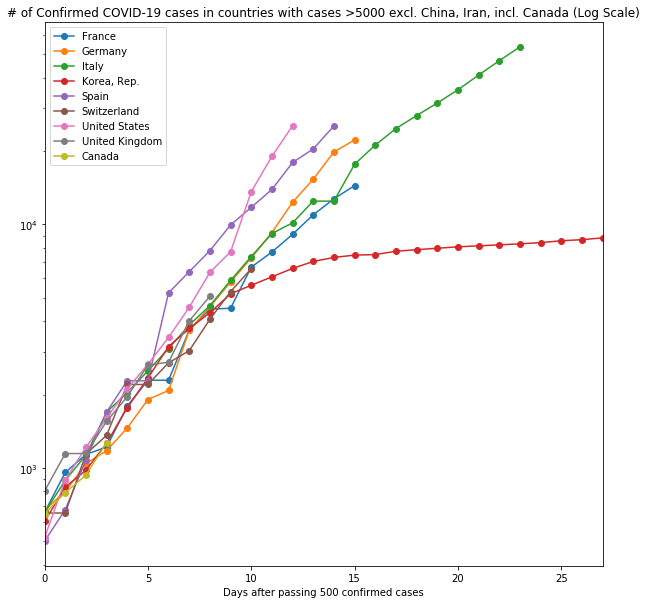

In [71]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in data.keys():
    data[c].plot(logy=True, marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in " + title_name + " (Log Scale)")
axes.set_xlabel("Days after passing " + str(min_case_num) + " confirmed cases")

Text(0.5, 0, 'Days after passing 500 confirmed cases')

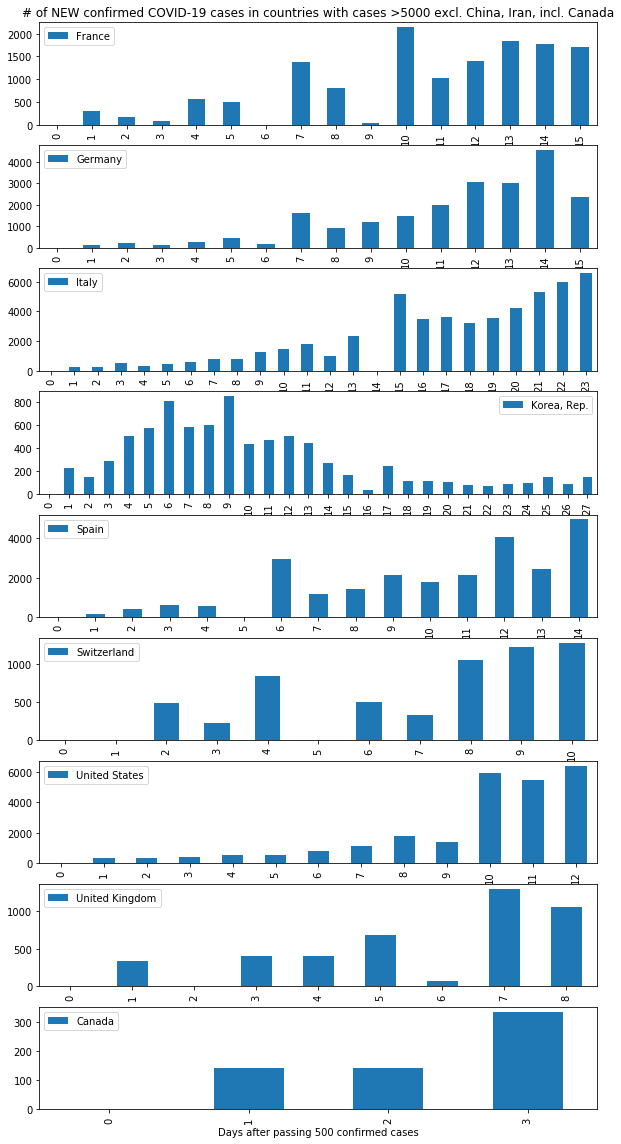

In [72]:
fig, axes = plt.subplots(len(data.keys()), figsize=(10, 20))

i = 0
for c in data.keys():
    data[c].diff().plot(ax=axes[i], kind="bar")
    axes[i].legend()
    i += 1

axes[0].set_title("# of NEW confirmed COVID-19 cases in " + title_name)
axes[-1].set_xlabel("Days after passing " + str(min_case_num) + " confirmed cases")

In [73]:
# pd.DataFrame([1,1.2,1.2**3]).pct_change()

In [74]:
for c in data.keys():
    size = pop[pop['Country'] == c]['SP.POP.TOTL']
    growth_rate = data[c].tail(5).pct_change().mean()
    num_cases = data[c].iloc[-1]
    projected_num_cases = int(num_cases*(1+growth_rate)**7)
    
    print(c)
    print('% growth rate:', round(growth_rate * 100, 2),'%')
    print('% Infected (today)', round(num_cases / int(size) * 100, 4), '%')
    print('% Infected (projected in 7 days)', round(projected_num_cases / int(size) * 100, 4), '%')
    print('# Infected (today) / Total Population:', int(num_cases),'/',int(size))
    print('# Infected (projected in 7 days) / Total Population:', int(projected_num_cases),'/',int(size))
    print('--')

France
% growth rate: 17.04 %
% Infected (today) 0.0215 %
% Infected (projected in 7 days) 0.0648 %
# Infected (today) / Total Population: 14431 / 66987244
# Infected (projected in 7 days) / Total Population: 43402 / 66987244
--
Germany
% growth rate: 24.73 %
% Infected (today) 0.0268 %
% Infected (projected in 7 days) 0.1258 %
# Infected (today) / Total Population: 22213 / 82927922
# Infected (projected in 7 days) / Total Population: 104322 / 82927922
--
Italy
% growth rate: 14.2 %
% Infected (today) 0.0887 %
% Infected (projected in 7 days) 0.2245 %
# Infected (today) / Total Population: 53578 / 60431283
# Infected (projected in 7 days) / Total Population: 135695 / 60431283
--
Korea, Rep.
% growth rate: 1.41 %
% Infected (today) 0.017 %
% Infected (projected in 7 days) 0.0188 %
# Infected (today) / Total Population: 8799 / 51635256
# Infected (projected in 7 days) / Total Population: 9704 / 51635256
--
Spain
% growth rate: 21.37 %
% Infected (today) 0.0543 %
% Infected (projected in 

In [75]:
# print(data_pct)

Text(0.5, 0, 'Days after infecting at least 1 out of 100,000 people')

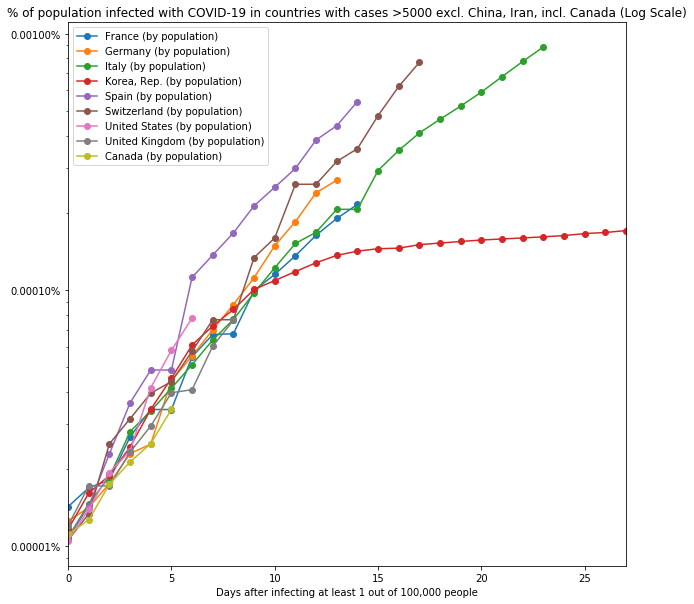

In [76]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in data.keys():
#     if c != 'United States':
#         data_pct[c].plot(logy=True, marker='o', color="grey")
#     else:
        data_pct[c].plot(logy=True, marker='o')

axes.legend()
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.set_title("% of population infected with COVID-19 in " + title_name + " (Log Scale)")
axes.set_xlabel("Days after infecting at least 1 out of 100,000 people")

Text(0.5, 0, 'Days after infecting at least 1 out of 100,000 people')

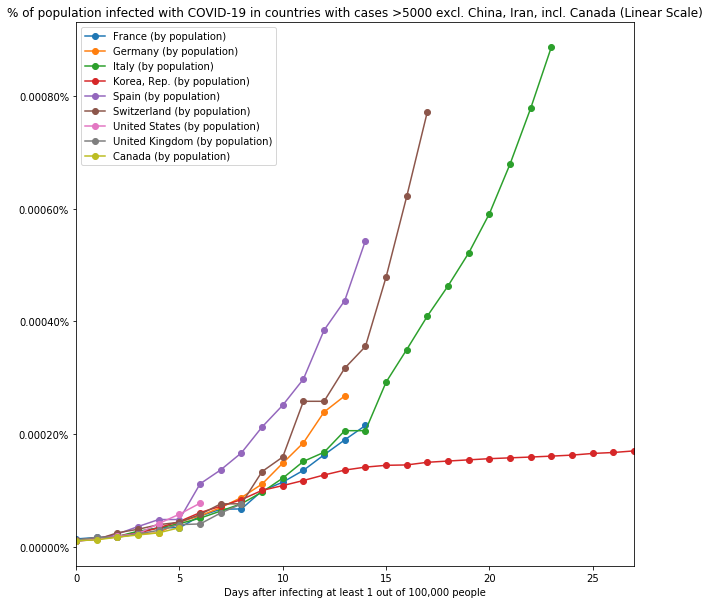

In [77]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in data.keys():
    data_pct[c].plot(marker='o')

axes.legend()
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.set_title("% of population infected with COVID-19 in " + title_name + " (Linear Scale)")
axes.set_xlabel("Days after infecting at least 1 out of 100,000 people")

Text(0.5, 0, 'Days after infecting at least 1 out of 100,000 people')

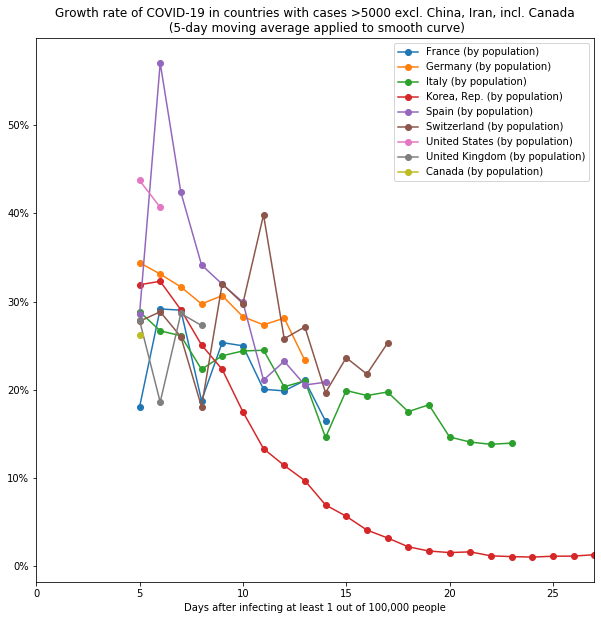

In [78]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in data.keys():
    growth_rate = data_pct[c].rolling(window=5).mean().pct_change() * 100.
    growth_rate.plot(marker='o')

axes.legend()
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.set_title("Growth rate of COVID-19 in " + title_name + "\n (5-day moving average applied to smooth curve)")
axes.set_xlabel("Days after infecting at least 1 out of 100,000 people")

Text(0.5, 0, 'Days after passing 500 confirmed cases')

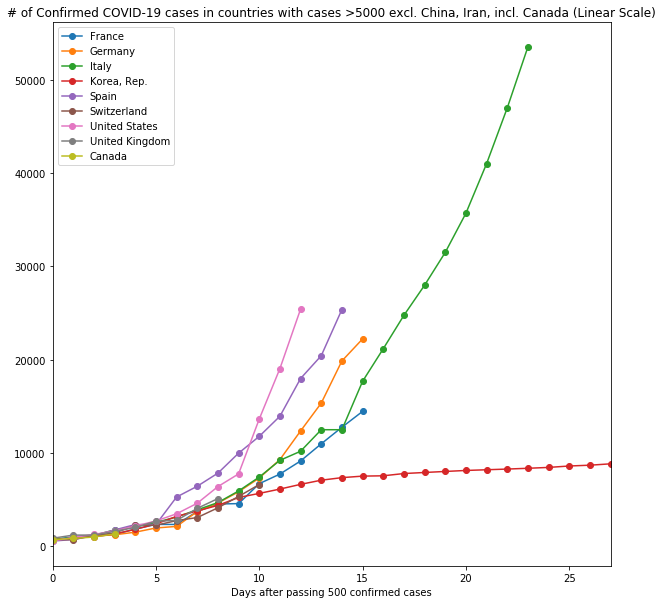

In [79]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in data.keys():
    data[c].plot(marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in " + title_name + " (Linear Scale)")
axes.set_xlabel("Days after passing " + str(min_case_num) + " confirmed cases")

Text(0.5, 0, 'Dates')

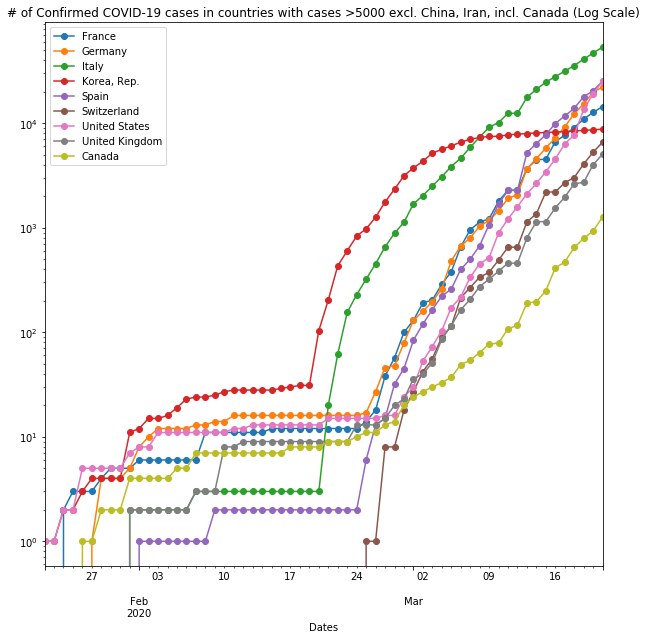

In [80]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for s in data.keys():
    data_original[s].plot(logy=True, marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in " + title_name + " (Log Scale)")
axes.set_xlabel("Dates")

Text(0.5, 0, 'Dates')

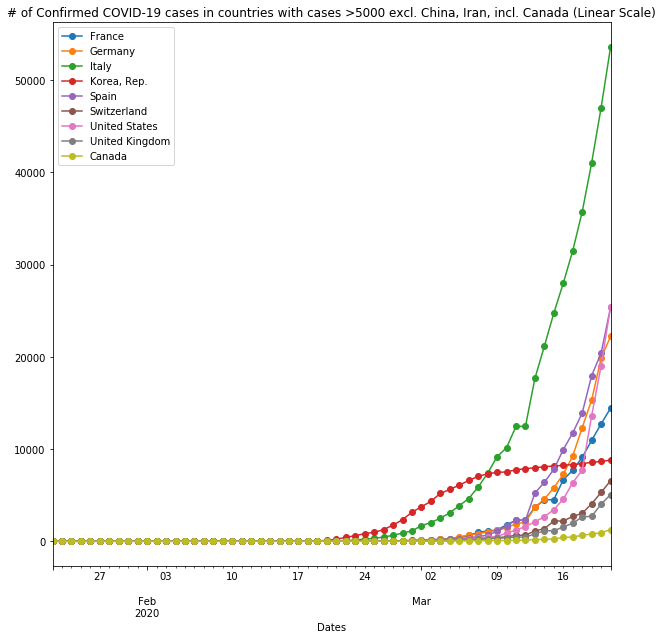

In [81]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for s in data.keys():
    data_original[s].plot(marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in " + title_name + " (Linear Scale)")
axes.set_xlabel("Dates")